# Breast Cancer Prediction Using Deep Learning

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Storing the dataset into pandas dataframe
data_frame = pd.read_csv("dataset/breast_cancer_data.csv")

In [3]:
# Printing the first 5 rows of the dataframe
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Checking for null values
data_frame.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Removing the Unnamed col
data_frame = data_frame.drop(columns = 'Unnamed: 32',axis=1)
data_frame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# Checking the target values amount
data_frame['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Here M represents maligant
<br> and B represent Benign

In [7]:
data_frame.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data_frame.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# data_frame['diagnosis'] = data_frame['diagnosis'].replace({'B':1,'M':0})
data_frame['diagnosis'] = data_frame['diagnosis'].apply(lambda x: 1 if x == 'B' else 0)

In [11]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Here 1 -> Benign
<br> 0 -> Maligant

In [12]:
# Seprating the features and target
X = data_frame.drop(columns =['id','diagnosis'],axis = 1)
y = data_frame['diagnosis']

In [13]:
print(X)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [14]:
# Splitting the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [16]:
# Standardizing the data
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [17]:
print(X_train)

[[ 1.94029252  0.85536022  1.81300604 ...  1.30477202 -0.10637168
  -0.43949769]
 [-0.54671184 -1.21003611 -0.59777015 ... -1.44505823 -0.95211319
  -1.26923392]
 [-0.73503734 -0.20269437 -0.75741621 ... -0.73762301 -0.23746961
  -1.01847415]
 ...
 [-0.57994575 -0.09896353 -0.62149589 ... -0.9563972  -0.01364388
  -0.12911281]
 [ 0.54723774  0.31134958  0.64280442 ...  1.40126787  1.30692792
   1.73041024]
 [ 0.53062078  0.07392121  0.48195196 ...  0.56748339 -0.38135758
  -1.07419854]]


**Building the neural network**

In [18]:
# Importing the libraries
import tensorflow as tf

# Setting a seed value to generate a random number
tf.random.set_seed(3)

from tensorflow import keras

In [19]:
# setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),  # First layer of network ( Flatten will convert a 2D to 1D array)
    keras.layers.Dense(20,activation='relu'),  # Hidden Layer
    keras.layers.Dense(2,activation='sigmoid') # Output Layer ( Using 2 for two classes)
])

In [20]:
# Compiling the model with optimizer , loss, metrics etc
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
# Training the neural network
# validationsplit is like train test split
history = model.fit(X_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2958 - loss: 1.2660 - val_accuracy: 0.3043 - val_loss: 1.1734
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4401 - loss: 0.9162 - val_accuracy: 0.4783 - val_loss: 0.8429
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6479 - loss: 0.6636 - val_accuracy: 0.7391 - val_loss: 0.6074
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7848 - loss: 0.4901 - val_accuracy: 0.8261 - val_loss: 0.4478
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8655 - loss: 0.3762 - val_accuracy: 0.8478 - val_loss: 0.3434
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9144 - loss: 0.3025 - val_accuracy: 0.9348 - val_loss: 0.2745
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9193 - loss: 0.2534 - val_accuracy: 0.9565 - val_loss: 0.2277
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9438 - loss: 0.2193 - val_accuracy: 0.9783 - val_loss

Visualizing the loss and accuracy

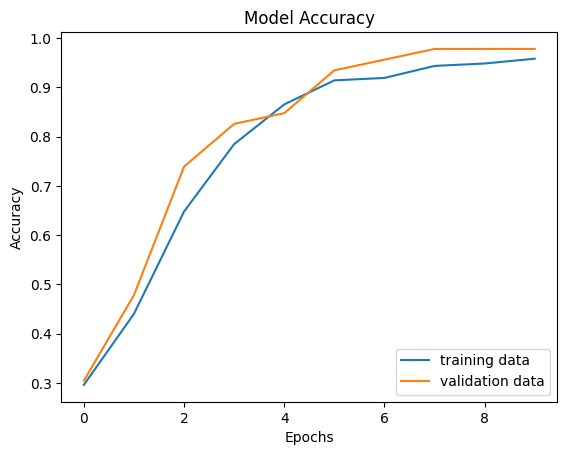

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training data','validation data'],loc = 'lower right')

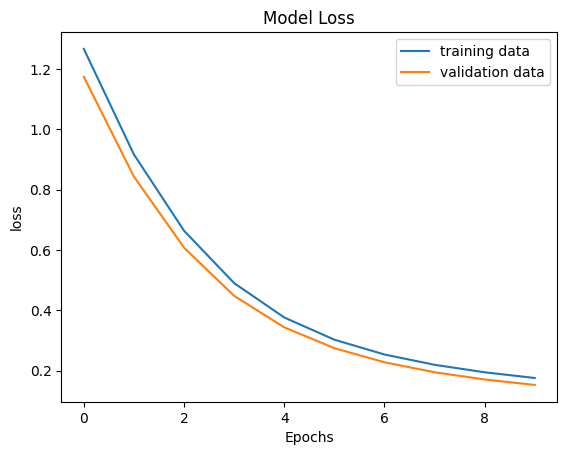

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['training data','validation data'],loc = 'upper right')

Accuracy value of the model on test data

In [24]:
loss, accuracy = model.evaluate(X_test,y_test) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9737 - loss: 0.1313 


In [25]:
print(accuracy)

0.9736841917037964


The accuracy is 97 %

Building a predictive system 

In [26]:
print(X_test.shape)
print(X_test[0])

(114, 30)
[ 0.44199702  0.212229    0.42163229  0.28029849  0.46059068  0.31923771
  0.32738868  0.3980721   0.45467963  0.05268291 -0.22649032 -0.56019683
 -0.32014237 -0.19125366 -0.76043663 -0.08046584 -0.26006979 -0.51214349
 -0.33901861 -0.23280218  0.65164049  0.74215747  0.53471259  0.33156671
  1.02726691  1.30534397  0.62768506  0.50566574  1.76577066  1.29575996]


In [27]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [28]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.58722675 0.27972162]


In [29]:
print(X_test)

[[ 0.44199702  0.212229    0.42163229 ...  0.50566574  1.76577066
   1.29575996]
 [-0.40269822 -1.65031591 -0.45179655 ... -0.4843214  -0.18151318
   0.64044108]
 [-0.26422359 -0.43781762 -0.32110392 ... -0.9749425  -0.19430322
  -0.6222737 ]
 ...
 [ 0.20659015  0.7377986   0.40152573 ...  2.00738244 -0.03602646
   1.80285195]
 [ 1.56087203  1.33482723  1.53955686 ...  0.88712591  0.66582708
   0.08375438]
 [-0.64918307 -0.44703814 -0.67739211 ... -1.07505695  0.49795778
  -0.96887944]]


In [30]:
print(y_pred)

[[0.58722675 0.27972162]
 [0.05656216 0.5349522 ]
 [0.02250534 0.5289668 ]
 [0.0296326  0.31070864]
 [0.1047149  0.45639288]
 [0.3104314  0.45621943]
 [0.02271557 0.5308536 ]
 [0.17050967 0.35298333]
 [0.05578475 0.50333977]
 [0.01924809 0.58604145]
 [0.76002085 0.23031865]
 [0.826386   0.05826112]
 [0.0253737  0.4735454 ]
 [0.20255542 0.5199553 ]
 [0.85479605 0.10643967]
 [0.33369464 0.47366023]
 [0.0340238  0.45415562]
 [0.04978488 0.41353592]
 [0.14339983 0.5862645 ]
 [0.34999514 0.3958862 ]
 [0.29624468 0.47871912]
 [0.7298014  0.13677679]
 [0.8615621  0.20102742]
 [0.11097616 0.41683382]
 [0.16851118 0.38156697]
 [0.0703721  0.45465392]
 [0.6931674  0.21793032]
 [0.7476958  0.27702716]
 [0.15949477 0.4317356 ]
 [0.0973094  0.4111406 ]
 [0.04134934 0.46321934]
 [0.09962015 0.3852458 ]
 [0.13651699 0.5044933 ]
 [0.33636373 0.47983247]
 [0.0466589  0.513561  ]
 [0.83169544 0.0877775 ]
 [0.8075273  0.2630837 ]
 [0.15155089 0.6011319 ]
 [0.9628185  0.06346105]
 [0.7104653  0.13250975]


model.predict() gives the prediction probability of each class for that datapoint.

In [31]:
# argmax function
my_list = [10,20,30]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

# So argmax will try to find out the index of the maximum value

[10, 20, 30]
2


In [32]:
# Converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0)

Building the predictive system

In [35]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

# Change the input data to a numpy array
input_data_as_numpy_arr = np.asarray(input_data)

# Reshaping the data
input_data_reshaped = input_data_as_numpy_arr.reshape(1,-1)

# Standardizing the data
input_data_standardized = Scaler.transform(input_data_reshaped)

# Predicting the value
y_predicted = model.predict(input_data_standardized)

# Printing the output
print(f"The probability of the classes predicted is : {y_predicted}")

# Taking the max value out of all
y_argmax = [np.argmax(y_predicted)]

# Printing the argmax value
print(f"The argmax value will be : {y_argmax}")

if y_argmax[0] == 0 :
    print("The patient is having Maligant Cancer")
else:
    print("The patient is having Benign Cancer")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The probability of the classes predicted is : [[0.8685903  0.10576712]]
The argmax value will be : [np.int64(0)]
The patient is having Maligant Cancer
